In [52]:
import pandas as pd

In [53]:
train = pd.read_csv("/content/drive/MyDrive/code/assets/Churn_Modelling.csv")
train.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression


# Set Matplotlib defaults
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


In [72]:
X = train.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"])
y = train["Exited"]

# Agora só Geography e Gender sobram como object
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes.apply(lambda x: np.issubdtype(x, np.integer))

In [57]:
X.shape, y.shape, discrete_features.shape

((10000, 10), (10000,), (10,))

In [63]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scoresö

,MI Scores
Age,0.079105
NumOfProducts,0.065862
IsActiveMember,0.008939
Tenure,0.008598
Balance,0.006787
Geography,0.005954
EstimatedSalary,0.002704
Gender,0.001201
CreditScore,0.000000
HasCrCard,0.000000


In [65]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores.head(10)

,MI Scores
Age,0.071619
NumOfProducts,0.071451
Geography,0.015790
IsActiveMember,0.015725
CreditScore,0.008043
Gender,0.007676
Balance,0.004885
EstimatedSalary,0.002704
HasCrCard,0.002614
Tenure,0.000000


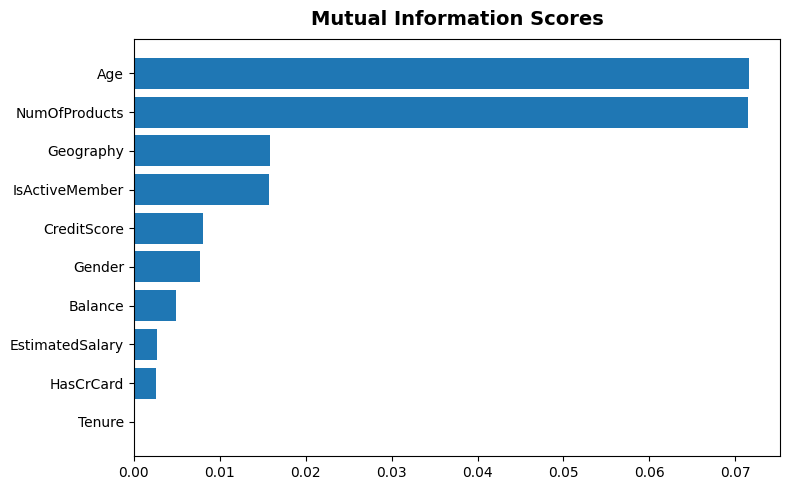

In [66]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

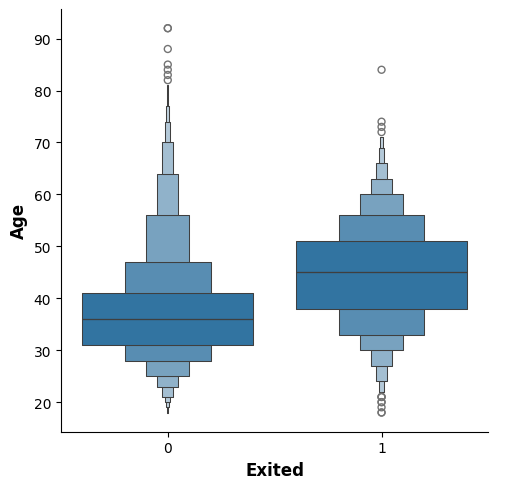

In [71]:
sns.catplot(x="Exited", y="Age", data=train, kind="boxen");

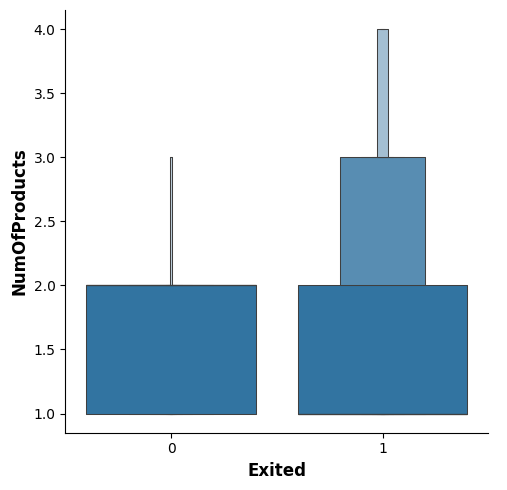

In [68]:
sns.catplot(x="Exited", y="NumOfProducts", data=train, kind="boxen");

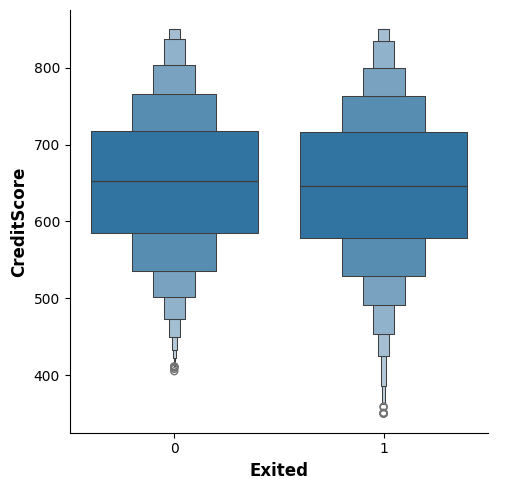

In [70]:
sns.catplot(x="Exited", y="CreditScore", data=train, kind="boxen");